In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes

set_matplotlib_formats("svg")

In [2]:
def try_float(v):
    try:
        return float(v)
    except:
        return v

In [8]:
raw = [
    "B3LYP 16.18 5.10 17.26 9.04 28.57 25.11",
    "XYG3 3.75 1.72 4.69 2.23 6.04 4.88",
    "lrc-XYG3 3.03 1.64 4.15 2.43 4.91 2.78",
    "XYGJ-OS 4.04 1.85 4.42 2.94 6.01 5.97",
    "lrc-XYGJ-OS 3.01 1.79 3.81 2.62 4.73 2.80",
    "revXYGJ-OS 3.02 2.34 3.56 3.09 4.12 2.46",
    "XYG-OS5 2.66 1.89 3.41 3.26 3.20 2.35",
    "revXYG3 2.47 1.59 2.86 2.74 3.30 2.56",
    "XYG5 2.32 1.55 2.59 2.51 3.15 2.33",
    "XYG6 2.24 1.47 2.51 2.61 2.89 2.31",
    "XYG7 2.05 1.31 2.43 2.30 2.78 2.00",
    "B2PLYP-D3 3.93 2.51 6.28 4.90 3.78 3.78",
    "DSD-BLYP-D3 3.08 1.88 4.32 3.04 3.92 3.15",
    r"$\omega$B97M(2) 2.19 1.41 2.58 1.99 2.45 2.99",
    "xrevDSD 2.23 1.80 3.03 2.11 2.33 2.23",
]
raw = [[try_float(v) for v in l.split()] for l in raw]
df = pd.DataFrame(raw, columns=["functional", "All", "Sub1", "Sub2", "Sub3", "Sub4", "Sub5"])
df = df.set_index("functional")

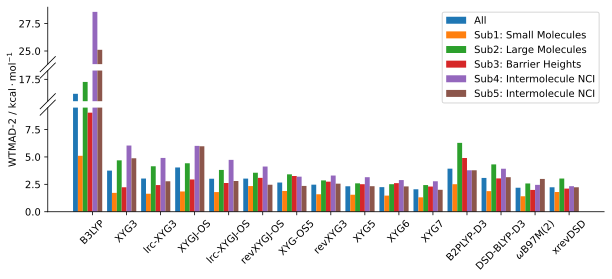

In [10]:
fig = plt.figure(figsize=(10, 3.7))
ax = brokenaxes(ylims=((0, 9.5), (15.5, 18.3), (23.8, 29)), hspace=.1)

for i, name in enumerate(df.index):
    for j in range(6):
        label = [
            "All", "Sub1: Small Molecules", "Sub2: Large Molecules",
            "Sub3: Barrier Heights", "Sub4: Intermolecule NCI", "Sub5: Intermolecule NCI"][j]
        if i != 0: label = None
        ax.bar(i - 0.5 + j / 7, df.loc[name].iloc[j], width=1/7, color=f"C{j}", label=label)
ax.axs[-1].set_xticks(range(len(df.index)))
ax.axs[-1].set_xticklabels(df.index, rotation=45)
ax.set_ylabel(r"WTMAD-2 / $\mathrm{kcal} \cdot \mathrm{mol}^{-1}$")
ax.legend()

fig.savefig("xdh-b3lyp-wtmad.pdf", bbox_inches='tight')
fig.savefig("xdh-b3lyp-wtmad.svg", bbox_inches='tight')

In [7]:
ax.axs[-1].set_xticklabels?

Signature: ax.axs[-1].set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs)
Docstring:
Set the xaxis' labels with list of string labels.

.. warning::
    This method should only be used after fixing the tick positions
    using `.Axes.set_xticks`. Otherwise, the labels may end up in
    unexpected positions.

Parameters
----------
labels : list of str
    The label texts.

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels.
    The default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, default: False
    Whether to set the minor ticklabels rather than the major ones.

Returns
-------
list of `.Text`
    The labels.

Other Parameters
----------------
**kwargs : `~.text.Text` properties.
File:      d:\miniconda3\lib\site-packages\matplotlib\axes\_base.py
Type:      method